In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
data = pd.read_csv('heart_disease_uci_formatted_and_cleaned.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67.0,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67.0,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41.0,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0
5,56.0,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,normal,0
6,62.0,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,normal,3
7,63.0,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,reversable defect,2
8,53.0,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,reversable defect,1
9,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0


In [11]:
# Normalize the `age` column to range [0, 1]
data['age'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())
# Map 'sex', 'fbs', and 'exang' to 0 and 1
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['fbs'] = data['fbs'].astype(int)  # Already boolean-like, convert to integer
data['exang'] = data['exang'].astype(int)  # Already boolean-like, convert to integer

# Standardize selected columns
scaler = StandardScaler()
columns_to_standardize = ['thalch', 'oldpeak', 'trestbps', 'chol']
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Label encode the 'slope' column
le = LabelEncoder()
data['slope'] = le.fit_transform(data['slope'])

#data.head()
# One-hot encoding for 'cp' and 'restecg' columns
cp_encoded = pd.get_dummies(data['cp'], prefix='cp')
restecg_encoded = pd.get_dummies(data['restecg'], prefix='restecg')
thal_encoded = pd.get_dummies(data['thal'], prefix='thal')

# Concatenate the one-hot encoded columns and drop the original 'thal' column
data = pd.concat([data.drop(columns=['thal']), thal_encoded], axis=1)
# Concatenate one-hot encoded columns and drop the originals
data = pd.concat([data.drop(columns=['cp', 'restecg']), cp_encoded, restecg_encoded], axis=1)

# Move the 'num' column to the last position
data = data[[col for col in data.columns if col != 'num'] + ['num']]

data.head(10)





,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,thal_fixed defect,thal_normal,thal_reversable defect,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,num
0,0.714286,1,0.703955,-0.102975,1,0.415572,0,1.272114,0,1,0,0,0,0,0,1,1,0,0,0
1,0.795918,1,1.573443,0.900540,0,-1.324610,1,0.530511,1,0,1,0,1,0,0,0,1,0,0,2
2,0.795918,1,-0.745193,-0.178712,0,-0.454519,1,1.550215,1,0,0,1,1,0,0,0,1,0,0,1
3,0.183673,1,-0.165534,0.218907,0,1.948590,0,2.384519,0,0,1,0,0,0,1,0,0,1,0,0
4,0.265306,0,-0.165534,-0.652068,0,1.327096,0,0.437811,2,0,1,0,0,1,0,0,1,0,0,0
5,0.571429,1,-0.745193,-0.046172,0,1.575694,0,-0.118392,2,0,1,0,0,1,0,0,0,1,0,0
6,0.693878,0,0.414125,0.559723,0,0.829901,0,2.477219,0,0,1,0,1,0,0,0,1,0,0,3
7,0.714286,1,-0.165534,0.294644,0,0.291273,0,0.437811,1,0,0,1,1,0,0,0,1,0,0,2
8,0.510204,1,0.414125,-0.671002,1,0.622737,1,2.013717,0,0,0,1,1,0,0,0,1,0,0,1
9,0.591837,1,0.414125,-0.879279,0,0.332706,0,-0.489193,1,1,0,0,1,0,0,0,0,1,0,0


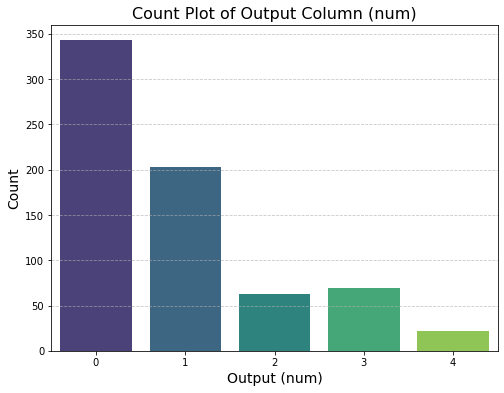

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the output column 'num'
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=data, palette='viridis')
plt.title('Count Plot of Output Column (num)', fontsize=16)
plt.xlabel('Output (num)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
X = data.iloc[:, :-1].values    # Input columns 
y = data.iloc[:, -1].values     # Output column (last column)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58  4  0  0  0]
 [13 25  0  0  0]
 [ 2 12  0  1  0]
 [ 4 14  1  0  0]
 [ 1  5  0  0  0]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        62
           1       0.42      0.66      0.51        38
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.59       140
   macro avg       0.23      0.32      0.27       140
weighted avg       0.44      0.59      0.51       140



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


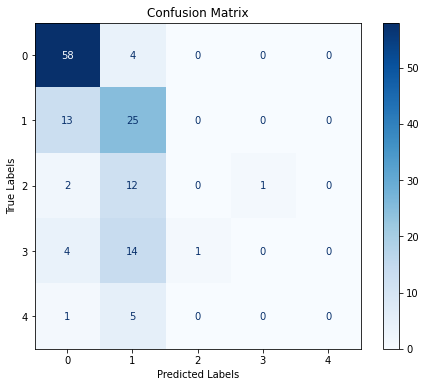

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
##k=19
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.grid(False)
plt.show()


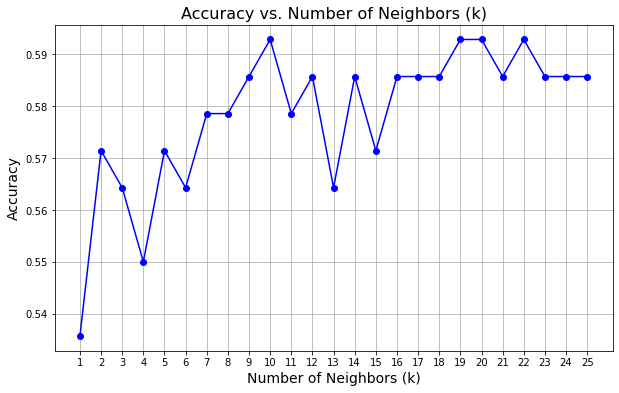

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List to store accuracies for different k values
k_values = range(1, 26)  # Check k values from 1 to 25
accuracies = []

# Iterate over different k values and calculate accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of Neighbors (k)', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
##k=19

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [43]:
# Number of folds for k-fold cross-validation
k_folds = 10

# Create K-Fold cross-validator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define K-NN model
knn = KNeighborsClassifier(n_neighbors=19)  # You can adjust n_neighbors

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.64285714 0.61428571 0.5        0.62857143 0.67142857 0.61428571
 0.61428571 0.64285714 0.58571429 0.64285714]
Mean Accuracy: 0.6157
Standard Deviation: 0.0445
